# Income Classification using Logistic Regression

### Project Brief

**Objective:** In this project, I will build a logistic regression model to classify income based on census data from the 1994 Census database. My goal is to predict whether a person earns more than $50,000 annually based on this data.  
Data source: https://archive.ics.uci.edu/dataset/20/census+income

### Tasks Overview

Here's a breakdown of the tasks I'll be performing using Python and various packages:

1. **Exploratory Data Analysis (EDA) and Logistic Regression Assumptions**: I'll start by checking if the dataset is balanced. Then, I'll create dummy variables for the predictor variables using libraries such as `pandas`, `numpy`, and `seaborn`.

2. **Heatmap of Correlation Values**: I'll visualize the correlation among predictor variables using the `seaborn` library.

3. **Split Data and Fit Logistic Regression Model**: I'll split the data into training and testing sets using `train_test_split` from `sklearn` and fit a logistic regression model on the training set using `LogisticRegression` from `sklearn`.

4. **Model Parameters and Coefficients**: I'll print model parameters, including the intercept and coefficients, using `LogisticRegression` from `sklearn`.

5. **Evaluate Model Predictions**: I'll evaluate the model's predictions on the test set by printing the confusion matrix and accuracy score using functions from `sklearn`.

6. **Model Coefficients and Variable Names**: I'll create a DataFrame of model coefficients and variable names, sorting them by coefficient values.

7. **Barplot of Coefficients**: I'll create a barplot of coefficients in ascending order using `seaborn` and `matplotlib` libraries.

8. **ROC Curve and AUC**: I'll plot the ROC curve and print the AUC (Area Under the Curve) value using `roc_curve` and `roc_auc_score` from `sklearn`.

Let's get started.

-----

## Importing Libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from scipy.stats import zscore

## Read Data

In [2]:
# Define the column names for the dataset
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read the CSV dataset into a pandas DataFrame with specified column names
df = pd.read_csv('dataset/adult.data', header=None, names=col_names)

# Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

## Data Inspection

In [3]:
# Print the first few rows of the cleaned DataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# View data type and non-null entry count using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Filter binary columns (assuming binary values are 0 and 1)
binary_columns = df.select_dtypes(include=[object]).copy()

# Add the "income" column to the binary_columns DataFrame
binary_columns['income'] = df['income']

# Create a DataFrame to store the unique values
unique_values_df = pd.DataFrame(columns=['Column Name', 'Unique Values'])

# Iterate through each binary column and list unique values
for column in binary_columns.columns:
    unique_values = df[column].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    
    # Remove "Column" from the column name
    column_name = f'Column "{column}"'
    column_name = column_name.replace('Column ', '')
    column_name = column_name.replace('"', '')

    unique_values_df = unique_values_df.append({'Column Name': column_name, 'Unique Values': unique_values_str}, ignore_index=True)

# Set the display width for the "Unique Values" column
pd.options.display.max_colwidth = 1000 
    
# Display the DataFrame as a table
unique_values_df

,Column Name,Unique Values
0,workclass,"State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked"
1,education,"Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th"
2,marital-status,"Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed"
3,occupation,"Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv"
4,relationship,"Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative"
5,race,"White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other"
6,sex,"Male, Female"
7,native-country,"United-States, Cuba, Jamaica, India, ?, Mexico, South, Puerto-Rico, Honduras, England, Canada, Germany, Iran, Philippines, Italy, Poland, Columbia, Cambodia, Thailand, Ecuador, Laos, Taiwan, Haiti, Portugal, Dominican-Republic, El-Salvador, France, Guatemala, China, Japan, Yugoslavia, Peru, Outlying-US(Guam-USVI-etc), Scotland, Trinadad&Tobago, Greece, Nicaragua, Vietnam, Hong, Ireland, Hungary, Holand-Netherlands"
8,income,"<=50K, >50K"


## Data Wrangling

In [6]:
# Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)

In [7]:
# Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df.income=='<=50K', 0, 1)
df['income_bin'] = np.where(df.income=='<=50K', 0, 1)

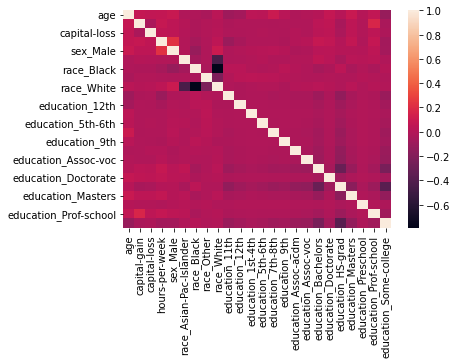

In [8]:
# Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()
plt.close()

## Exploratory Data Analysis

### Summary Statistics

In [9]:
# Generates descriptive statistics for numerical columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_bin
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
# Generates descriptive statistics for binary columns
binary_columns.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**Summary:**  
The variable "income" appears to be imbalanced based on the provided values:
+ The proportion of individuals with income less than or equal to 50K USD is approximately 75.92% (0.75919).
+ The proportion of individuals with income greater than 50K USD is approximately 24.08% (0.24081).   

### (Visual) Outlier Detection

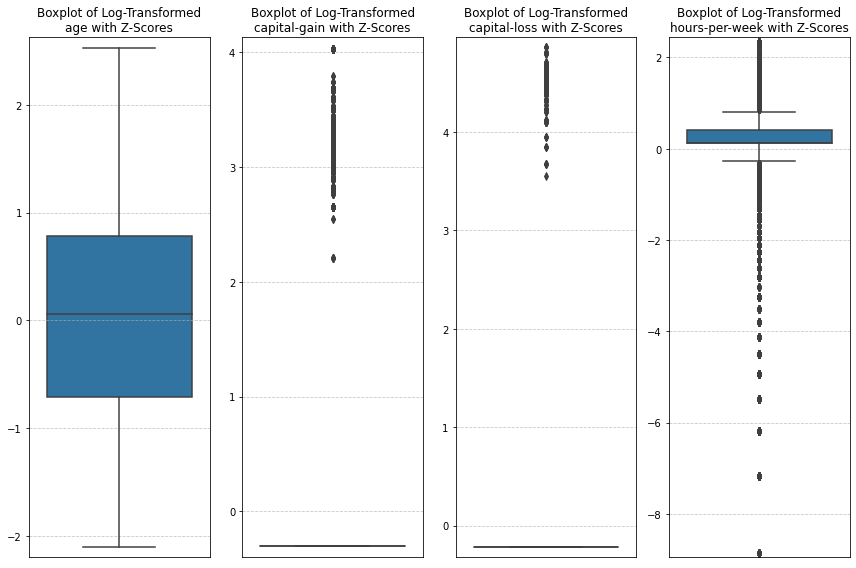

In [11]:
# Select the numerical columns for log transformation and z-score calculation
numerical_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create individual boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    # Log-transform the data and add a small constant to avoid log(0)
    log_data = np.log(df[col] + 0.01)
    
    # Calculate z-scores for log-transformed data
    z_scores = zscore(log_data)
    
    # Create a boxplot for the current column
    plt.subplot(1, 4, i + 1)  # Create a 1x4 grid of subplots
    sns.boxplot(data=z_scores, orient='v')  # Stretched on the vertical axis
    
    # Dynamically set y-axis limits based on the range of z-scores
    y_min = min(z_scores)
    y_max = max(z_scores)
    y_padding = 0.1  # Add a small padding for better visualization
    plt.ylim(y_min - y_padding, y_max + y_padding)
    
    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Split the column name into two lines
    col_parts = col.split()
    if len(col_parts) == 2:
        col_label = f"Boxplot of Log-Transformed\n{col_parts[0]} -\n{col_parts[1]} with Z-Scores"
    else:
        col_label = f"Boxplot of Log-Transformed\n{col} with Z-Scores"
    
    plt.xticks([])
    plt.title(col_label)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

# Remove the samples with extreme IV values:
#q_hi  = df["IV"].quantile(0.99)
#df_filtered = df[(df["IV"] < q_hi)]

**Summary:**  
+ age: The minimum age is 17, and the maximum age is 90. There don't appear to be any outliers in the 'age' column.
+ education-num: The minimum education-num is 1, and the maximum is 16, which corresponds to the number of years of education. There don't appear to be any outliers in this column.
+ capital-gain: The minimum capital-gain is 0, and the maximum is 99,999. There is a significant range in values, and some values may be considered outliers depending on the context. Very high capital gains are unusual but not necessarily incorrect. We keeep them in.
+ capital-loss: The minimum capital-loss is 0, and the maximum is 4,356. Similar to capital-gain, there is a significant range in values, and high capital losses may be unusual but not necessarily incorrect. We keeep them in.
+ hours-per-week: The minimum hours-per-week is 1, and the maximum is 99. While there is a range of values, there don't appear to be any extreme outliers in this column. 99 hours would equal approx. 14 hours a day, which is possible. We keeep them in.

### Assessing Linearity of Relationship

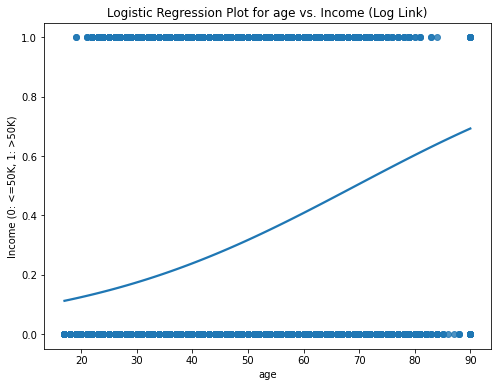

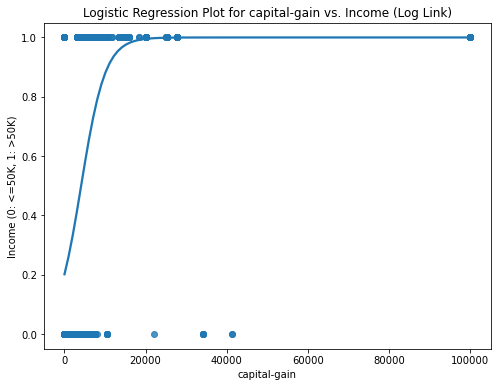

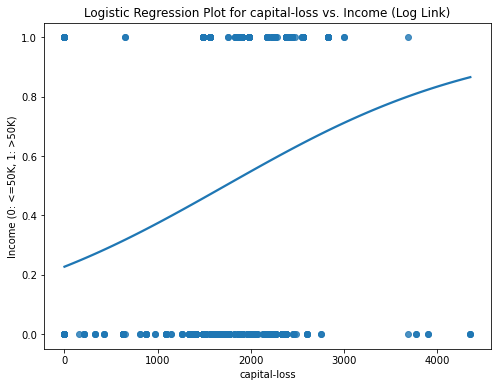

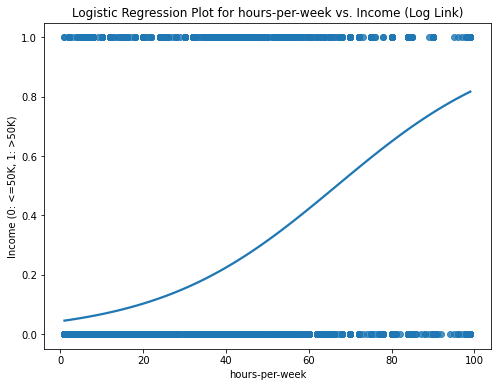

In [12]:
# List of numeric feature columns to create plots for
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create logistic regression plots for each feature against 'income_bin'
for feature_col in feature_cols:
    plt.figure(figsize=(8, 6))
    
    # Create a logistic regression plot (log link)
    sns.regplot(x=feature_col, y='income_bin', data=df, logistic=True, ci=None)
    
    plt.title(f'Logistic Regression Plot for {feature_col} vs. Income (Log Link)')
    plt.xlabel(feature_col)
    plt.ylabel('Income (0: <=50K, 1: >50K)')
    
    plt.show()
    plt.close()

**Summary:**  
The fit models resemble sigmoidal curves, suggesting that the features are linearly related to the logit of the income outcome.

### Assessing Imbalance of Outcome Variable

In [13]:
# Check class imbalance
print(df.income.value_counts(normalize=True))

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


In [14]:
# Without stratification:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

# Calculate Positivity Rate
train_positivity_rate = sum(y_train)/y_train.shape[0]
test_positivity_rate = sum(y_test)/y_test.shape[0]
print('Original data:')
print('train positivity rate: ', train_positivity_rate)
print('test positivity rate: ', test_positivity_rate)
print('  ')

# With stratification:
x_train_str, x_test_str, y_train_str, y_test_str = train_test_split(X, y, random_state=1, test_size=0.2, stratify = y)

# Calculate Positivity Rate
str_train_positivity_rate = sum(y_train_str)/y_train_str.shape[0]
str_test_positivity_rate = sum(y_test_str)/y_test_str.shape[0]
print('Stratified data:') 
print('train positivity rate: ', str_train_positivity_rate)
print('test positivity rate: ', str_test_positivity_rate)

Original data:
train positivity rate:  0.24393427518427518
test positivity rate:  0.22831260555811453
  
Stratified data:
train positivity rate:  0.24082463144963145
test positivity rate:  0.24074927068939045


**Note:**  
After using stratification, the training and testing datasets should have a very similar positivity rate (but stratification does not necessarily cause the positivity rate of the dataset to reach closer to .5).

## Data Analysis

### Fit Model

In [15]:
# Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train_str, y_train_str)
y_pred = log_reg.predict(x_test_str)

# Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('  ')
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercept:
-5.5182248384374235
  
Model Parameters, Coeff:
[[ 3.62043751e-02  3.14153007e-04  6.93387591e-04  2.93757026e-02
   1.01843043e+00  0.00000000e+00 -2.86551268e-01  0.00000000e+00
   1.25747250e-01 -5.53302749e-01  0.00000000e+00 -2.28722762e-02
  -3.85955998e-01 -9.05376168e-01 -3.82874007e-01  6.13228226e-01
   5.75564992e-01  1.31598971e+00  1.89371665e+00  0.00000000e+00
   1.64212927e+00  0.00000000e+00  1.85744637e+00  3.76112548e-01]]


### Assess Model Fit

In [16]:
# Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print(f'Accuracy Score on test set:{accuracy_score(y_test_str, y_pred)}')
print(f'Precision Score on test set:{precision_score(y_test_str, y_pred)}')
print(f'Recall Score on test set:{recall_score(y_test_str, y_pred)}')

Accuracy Score on test set:0.8229694457239367
Precision Score on test set:0.7393310265282583
Recall Score on test set:0.40880102040816324


**Summary:** 
1. **Accuracy Score on Test Set (0.8237):**
   - Accuracy is a measure of how many predictions your model got correct out of the total predictions.
   - In this case, the model correctly predicted approximately 82.37% of the test samples, which suggests that it is reasonably accurate.
<br>
<br>
2. **Precision Score on Test Set (0.7397):**
   - Precision is a measure of how many of the positive predictions made by the model were actually correct.
   - Here, a precision score of approximately 0.7397 means that out of all the instances the model predicted as positive (e.g., individuals with income greater than 50,000 USD), about 73.97% were correct.
<br>
<br>
3. **Recall Score on Test Set (0.4133):**
   - Recall, also known as sensitivity or true positive rate, measures how many of the actual positive cases in the dataset were correctly predicted as positive by the model.
   - In this case, the recall score of approximately 0.4133 indicates that the model captured about 41.33% of all the actual positive cases (individuals with income greater than 50,000 USD).
<br>

The model has decent accuracy, meaning it gets a significant portion of predictions correct. However, it has relatively lower recall, which suggests that it may miss some of the individuals with income greater than 50,000 USD.

Confusion Matrix on test set:
[[4719  226]
 [ 927  641]]


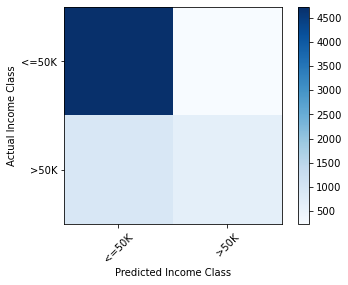

In [17]:
# Creating the confusion matrix
conf_m = confusion_matrix(y_test_str, y_pred)
print('Confusion Matrix on test set:')
print(conf_m)


plt.imshow(conf_m, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(df["income"].unique()))
plt.xticks(tick_marks, df["income"].unique(), rotation=45)
plt.yticks(tick_marks, df["income"].unique())
plt.xlabel("Predicted Income Class")
plt.ylabel("Actual Income Class")
plt.show()

The diagonal intersections of the confusion matrix indicate the number of
correct predictions (4717, 648). 

(0.0, 1.0)

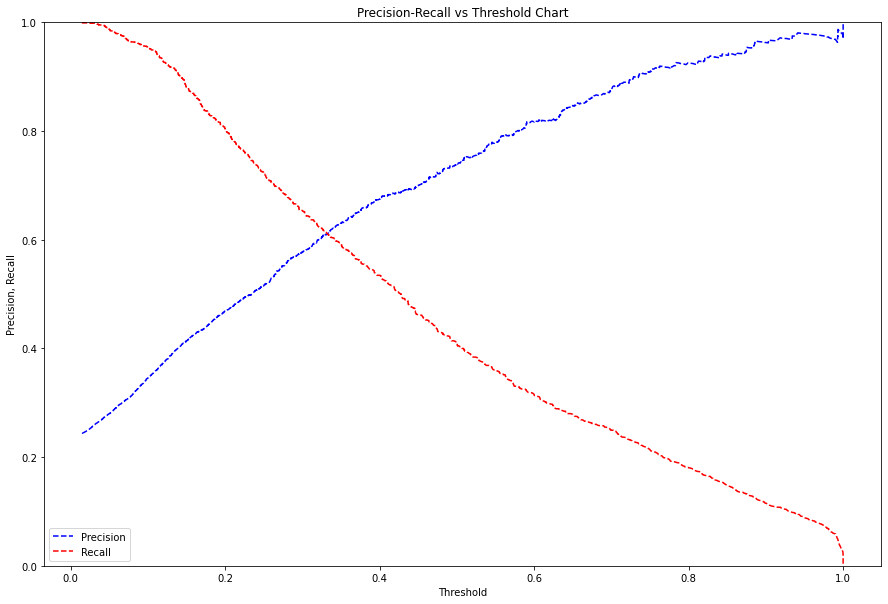

In [18]:
# Predict test_y values and probabilities based on fitted logistic regression model
pred_y = log_reg.predict(x_test_str)
probs_y = log_reg.predict_proba(x_test_str) # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

precision, recall, thresholds = precision_recall_curve(y_test_str, probs_y[:, 1])

# Retrieve probability of being 1 (in the second column of probs_y)
pr_auc = roc_auc_score(y_test_str, probs_y[:, 1])

# Increase the size of the graph
plt.figure(figsize=(15, 10))

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])


In [19]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
13,education_7th-8th,-0.905376
9,education_11th,-0.553303
12,education_5th-6th,-0.385956
14,education_9th,-0.382874
6,race_Black,-0.286551
11,education_1st-4th,-0.022872
1,capital-gain,0.000314
2,capital-loss,0.000693
3,hours-per-week,0.029376
0,age,0.036204


**Key Findings:**  

1. **Age**: Age has a positive influence on income levels. As individuals get older, their likelihood of earning more than $50,000 increases, although the effect is relatively small.

2. **Capital Gain and Capital Loss**: Financial gains and losses, as represented by capital gain and capital loss, have a minor impact on income. Higher capital gains or losses are associated with slightly higher odds of earning more than $50,000.

3. **Hours per Week**: Working more hours per week positively affects income. Individuals who work more hours are more likely to earn over $50,000.

4. **Race**: Race plays a role in income disparities. Being Black has a negative effect on income, reducing the likelihood of earning more than $50,000 compared to White individuals.

5. **Gender (Sex)**: Gender significantly influences income levels. Men are more likely to earn over $50,000 compared to women.

6. **Education**: Education level is a strong predictor of income. Higher education levels, such as a Doctorate, Masters, or Prof-school, increase the chances of earning more than $50,000.

7. **Other Education Categories**: Several other education categories, including 7th-8th and 11th, have a negative impact on income. Having these education levels decreases the likelihood of earning more than $50,000.



### Inspect Model Parameters

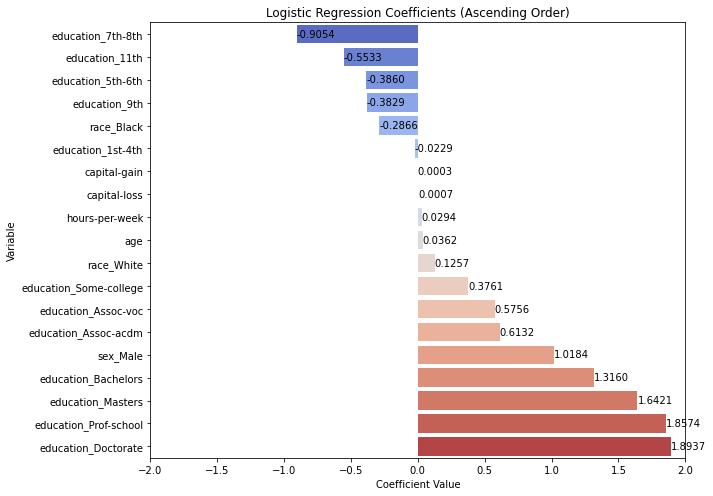

In [20]:
# Sort the coefficients in ascending order
coef_df_sorted = coef_df.sort_values(by='coef', ascending=True)

# Create a color palette for the barplot
colors = sns.color_palette("coolwarm", len(coef_df_sorted))

# Create a barplot
plt.figure(figsize=(10, 7))
sns.barplot(data=coef_df_sorted, x='coef', y='var', palette=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.title('Logistic Regression Coefficients (Ascending Order)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add coefficient values as annotations on the bars
for i, coef in enumerate(coef_df_sorted['coef']):
    plt.text(coef, i, f'{coef:.4f}', va='center', fontsize=10, color='black')

# Set the x-axis limits to start at -2 and end at 2
plt.xlim(-2, 2)
#plt.xlim(coef_df_sorted['coef'].min() - 0.1, coef_df_sorted['coef'].max() + 0.1) # dynamically fit

plt.tight_layout()  # Ensures that labels are not cut off
plt.show()

**Summary:** 
1. *Negative Impact Coefficients:*  
   - **Education Level (Low):** People with lower education levels, such as 7th-8th grade, 11th grade, 5th-6th grade, and 9th grade, have a negative impact on their income. This means that individuals with lower education tend to have lower incomes. The impact is strongest for those with only a 7th-8th-grade education, which has the most negative effect on income.

   - **Race (Black):** Being part of the Black race has a negative impact on income. This suggests that, on average, Black individuals tend to have lower incomes compared to other racial groups.

   - **Education (1st-4th grade):** Having completed only 1st-4th grade also has a slightly negative impact on income.
<br>
<br>
2. *Neutral Coefficients:*  
   - **Capital Gain and Loss:** The capital gain and loss variables have coefficients close to zero, indicating that they have a minimal impact on income. This suggests that the financial gains or losses individuals experience from investments or assets don't significantly influence their income in this model.

   - **Age:** Age has a positive impact, meaning that, on average, as people get older, their income tends to increase. However, the effect is relatively modest compared to other factors.
<br>
<br>
3. *Positive Impact Coefficients:*  
   - **Education Level (High):** Individuals with higher education levels, such as Doctorate, Prof-school, Masters, and Bachelors degrees, tend to have significantly higher incomes. Doctorate and Prof-school degrees have the strongest positive impact on income, followed by Masters and Bachelors degrees.

   - **Sex (Male):** Being male has a positive impact on income in this model. On average, males tend to have higher incomes compared to females.

   - **Education Level (Intermediate):** Some intermediate education levels, such as Assoc-voc, Assoc-acdm, and Some-college, also have positive impacts on income. These education levels, while not as high as advanced degrees, still contribute to higher incomes compared to lower education levels.

ROC AUC score: 0.8458


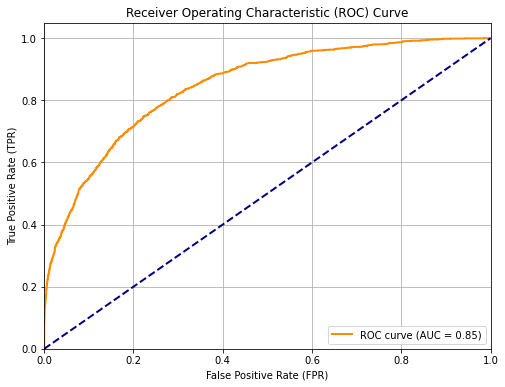

In [21]:
# Predict y-values
y_pred_prob = log_reg.predict_proba(x_test)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print(f'ROC AUC score: {roc_auc:.4f}')

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Highlight the point on the ROC curve where you may want to set the threshold
# For example, where the FPR is low and TPR is high, depending on your application's needs.
# You can choose a threshold that balances false positives and false negatives.
# plt.scatter(fpr[desired_index], tpr[desired_index], c='red', marker='o', s=100, label='Threshold: {:.2f}'.format(thresholds[desired_index]))

plt.show()

**Summary:**  
A Receiver Operating Characteristic Area Under the Curve (ROC AUC) score of 0.8459 suggests that the binary classification model, which predicts income levels, is performing quite well in distinguishing between individuals with higher and lower incomes. To put it in practical terms, the model is effective at making predictions, and its predictions align well with the actual income levels in the dataset.